### Analysis of MCU Box Office Performance

Importing relavent packages

In [271]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [272]:
df = pd.read_csv('mcu_box_office.csv')

Dispay the first 10 rows

In [306]:
df.head(27)

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/08,94,91,126,186000000,102118668,318604126,585171547
1,The Incredible Hulk,1,6/13/08,67,70,112,137500000,55414050,134806913,265573859
2,Iron Man 2,1,5/7/10,72,71,124,170000000,128122480,312433331,621156389
3,Thor,1,5/6/11,77,76,113,150000000,65723338,181030624,449326618
4,Captain America: The First Avenger,1,7/22/11,79,75,124,140000000,65058524,176654505,370569776
5,The Avengers,1,5/4/12,91,91,143,225000000,207438708,623357910,1515100211
6,Iron Man 3,2,5/3/13,79,78,130,200000000,174144585,408992272,1215392272
7,Thor: The Dark World,2,11/8/13,66,75,111,150000000,85737841,206362140,644602516
8,Captain America: The Winter Soldier,2,4/4/14,90,92,135,170000000,95023721,259746958,714401889
9,Guardians of the Galaxy,2,8/1/14,92,92,121,170000000,94320883,333714112,770882395


Display the last 10 rows

In [274]:
df.tail(10)

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
17,Black Panther,3,2/16/18,96,79,134,200000000,202003951,700059566,1336494321
18,Avengers: Infinity War,3,4/27/18,85,91,149,300000000,257698183,678815482,2048359754
19,Ant-Man and the Wasp,3,7/6/18,87,81,118,130000000,75812205,216648740,623144660
20,Captain Marvel,3,3/8/19,79,45,124,175000000,153433423,426829839,1129727388
21,Avengers: End Game,3,4/26/19,94,90,181,400000000,357115007,858373000,2797800564
22,Spider-Man: Far From Home,3,7/2/19,90,95,129,160000000,92579212,390532085,1132532832
23,Black Widow,4,7/9/21,79,91,133,200000000,80366312,183651655,379751655
24,Shang-Chi and the Legend of the Ten Rings,4,9/3/21,91,98,133,150000000,75388688,224543292,432243292
25,Eternals,4,11/5/21,47,78,157,200000000,71297219,164870264,402064929
26,Spider-Man: No Way Home,4,12/17/21,93,98,148,200000000,260138569,803975784,1891108035


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   movie_title           27 non-null     object
 1   mcu_phase             27 non-null     int64 
 2   release_date          27 non-null     object
 3   tomato_meter          27 non-null     int64 
 4   audience_score        27 non-null     int64 
 5   movie_duration        27 non-null     int64 
 6   production_budget     27 non-null     int64 
 7   opening_weekend       27 non-null     int64 
 8   domestic_box_office   27 non-null     int64 
 9   worldwide_box_office  27 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.2+ KB


Check for null values or duplicates

In [276]:
print("Missing values:",df.isnull().values.any())

Missing values: False


In [277]:
print("Duplicate values:", df.duplicated().any())

Duplicate values: False


General Information about the dataset

In [278]:
df.describe()

,mcu_phase,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
count,27.000000,27.000000,27.000000,27.000000,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01
mean,2.481481,83.555556,83.740741,131.925926,1.955000e+08,1.332560e+08,3.675189e+08,9.505850e+08
std,1.014145,11.112479,11.002072,15.531422,6.562730e+07,7.456853e+07,2.024268e+08,5.919297e+08
min,1.000000,47.000000,45.000000,111.000000,1.300000e+08,5.541405e+07,1.348069e+08,2.655739e+08
25%,2.000000,79.000000,78.000000,122.500000,1.550000e+08,7.808926e+07,2.115054e+08,5.520150e+08
50%,3.000000,87.000000,87.000000,130.000000,1.750000e+08,1.021187e+08,3.186041e+08,7.708824e+08
75%,3.000000,91.500000,91.000000,138.000000,2.000000e+08,1.766419e+08,4.179111e+08,1.183655e+09
max,4.000000,96.000000,98.000000,181.000000,4.000000e+08,3.571150e+08,8.583730e+08,2.797801e+09


In [279]:
df.columns

Index(['movie_title', 'mcu_phase', 'release_date', 'tomato_meter',
       'audience_score', 'movie_duration', 'production_budget',
       'opening_weekend', 'domestic_box_office', 'worldwide_box_office'],
      dtype='object')

Top 10 Performers at Domestic Box Office

In [280]:
df.sort_values('domestic_box_office', ascending=False).head(10)

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
21,Avengers: End Game,3,4/26/19,94,90,181,400000000,357115007,858373000,2797800564
26,Spider-Man: No Way Home,4,12/17/21,93,98,148,200000000,260138569,803975784,1891108035
17,Black Panther,3,2/16/18,96,79,134,200000000,202003951,700059566,1336494321
18,Avengers: Infinity War,3,4/27/18,85,91,149,300000000,257698183,678815482,2048359754
5,The Avengers,1,5/4/12,91,91,143,225000000,207438708,623357910,1515100211
10,Avengers: Age of Ultron,2,5/1/15,76,83,141,365000000,191271109,459005868,1395316979
20,Captain Marvel,3,3/8/19,79,45,124,175000000,153433423,426829839,1129727388
6,Iron Man 3,2,5/3/13,79,78,130,200000000,174144585,408992272,1215392272
12,Captain America: Civil War,3,5/6/16,90,89,146,250000000,179139142,408084349,1151918521
22,Spider-Man: Far From Home,3,7/2/19,90,95,129,160000000,92579212,390532085,1132532832


Duration of the film

In [281]:
df.sort_values('movie_duration', ascending=False).head(10)

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
21,Avengers: End Game,3,4/26/19,94,90,181,400000000,357115007,858373000,2797800564
25,Eternals,4,11/5/21,47,78,157,200000000,71297219,164870264,402064929
18,Avengers: Infinity War,3,4/27/18,85,91,149,300000000,257698183,678815482,2048359754
26,Spider-Man: No Way Home,4,12/17/21,93,98,148,200000000,260138569,803975784,1891108035
12,Captain America: Civil War,3,5/6/16,90,89,146,250000000,179139142,408084349,1151918521
5,The Avengers,1,5/4/12,91,91,143,225000000,207438708,623357910,1515100211
10,Avengers: Age of Ultron,2,5/1/15,76,83,141,365000000,191271109,459005868,1395316979
8,Captain America: The Winter Soldier,2,4/4/14,90,92,135,170000000,95023721,259746958,714401889
14,Guardians of the Galaxy Vol. 2,3,5/5/17,85,87,135,200000000,146510104,389813101,869113101
17,Black Panther,3,2/16/18,96,79,134,200000000,202003951,700059566,1336494321


Biggest Budgets

In [282]:
df.sort_values('production_budget', ascending=False).head(10)

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
21,Avengers: End Game,3,4/26/19,94,90,181,400000000,357115007,858373000,2797800564
10,Avengers: Age of Ultron,2,5/1/15,76,83,141,365000000,191271109,459005868,1395316979
18,Avengers: Infinity War,3,4/27/18,85,91,149,300000000,257698183,678815482,2048359754
12,Captain America: Civil War,3,5/6/16,90,89,146,250000000,179139142,408084349,1151918521
5,The Avengers,1,5/4/12,91,91,143,225000000,207438708,623357910,1515100211
26,Spider-Man: No Way Home,4,12/17/21,93,98,148,200000000,260138569,803975784,1891108035
25,Eternals,4,11/5/21,47,78,157,200000000,71297219,164870264,402064929
23,Black Widow,4,7/9/21,79,91,133,200000000,80366312,183651655,379751655
6,Iron Man 3,2,5/3/13,79,78,130,200000000,174144585,408992272,1215392272
17,Black Panther,3,2/16/18,96,79,134,200000000,202003951,700059566,1336494321


Does the phase matter?

In [283]:
df.groupby('mcu_phase')['audience_score'].mean().sort_values(ascending=False)

mcu_phase
4    91.250000
2    84.166667
3    83.363636
1    79.000000
Name: audience_score, dtype: float64

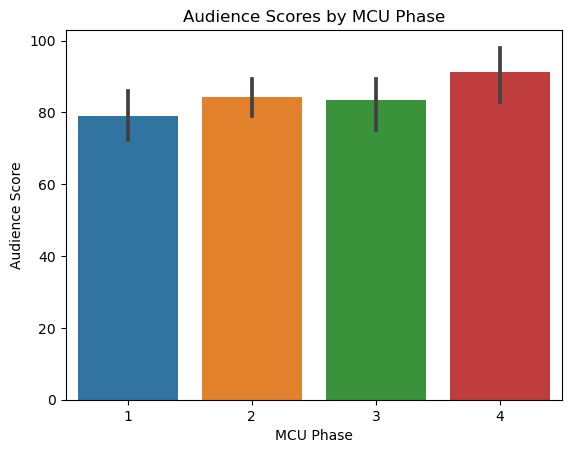

In [295]:
sns.barplot(df, x='mcu_phase', y='audience_score') 
plt.title("Audience Scores by MCU Phase")
plt.xlabel("MCU Phase")
plt.ylabel("Audience Score")
plt.show()

Which MCU Phase has the highest average Opening Weekend?

In [288]:
#df.groupby('mcu_phase')['opening_weekend'].mean().sort_values(ascending=False)

# Group by 'mcu_phase' and calculate the mean of 'opening_weekend'
mean_opening_weekend = df.groupby('mcu_phase')['opening_weekend'].mean()

# Sort values in descending order and convert to integer
sorted_mean_opening_weekend = mean_opening_weekend.sort_values(ascending=False).astype(int)

print(sorted_mean_opening_weekend)

mcu_phase
3    162647457
4    121797697
2    116287277
1    103979294
Name: opening_weekend, dtype: int64


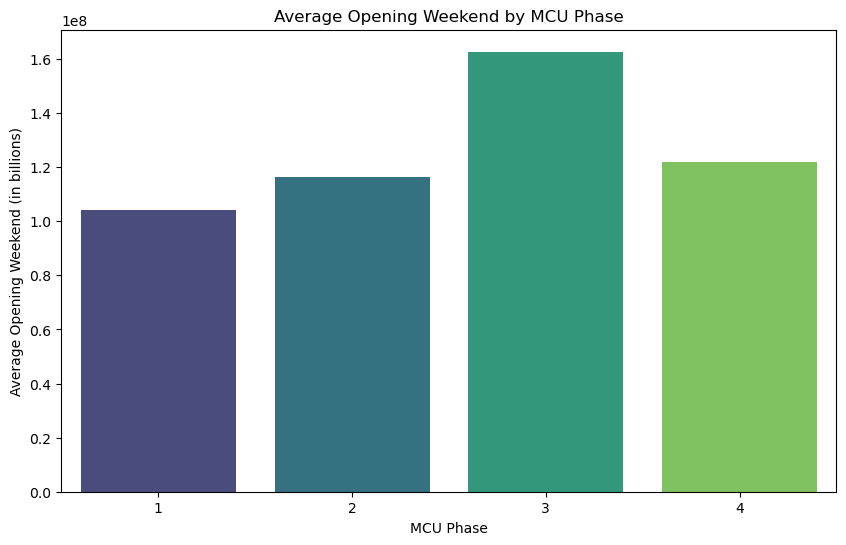

In [294]:
#sns.barplot(df, x='mcu_phase', y='opening_weekend') 
#plt.title("Openning Weekend Revenue by MCU Phase")
#plt.show()

# Reset index to convert Series to DataFrame for plotting
sorted_mean_opening_weekend = sorted_mean_opening_weekend.reset_index()

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='mcu_phase', y='opening_weekend', data=sorted_mean_opening_weekend, palette='viridis')

# Adding title and labels
plt.title('Average Opening Weekend by MCU Phase')
plt.xlabel('MCU Phase')
plt.ylabel('Average Opening Weekend (in millions)')
plt.show()


Longest runtime

In [302]:
#top10_len = df.nlargest(10, 'movie_duration')[['movie_title', 'movie_duration']].set_index('movie_title')

df_sorted = df.sort_values(by='movie_duration', ascending=False)

# Select top 5 longest films
top_longest_films = df_sorted.head(10)

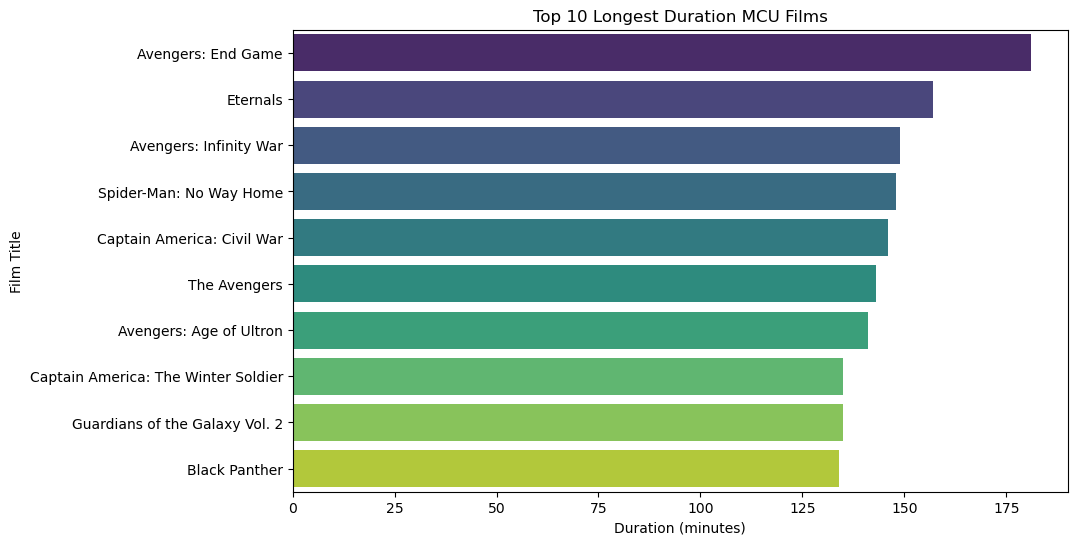

In [303]:
plt.figure(figsize=(10, 6))
sns.barplot(x='movie_duration', y='movie_title', data=top_longest_films, palette='viridis')

# Adding title and labels
plt.title('Top 10 Longest Duration MCU Films')
plt.xlabel('Duration (minutes)')
plt.ylabel('Film Title')
plt.show()

In [305]:
df.sort_values('audience_score', ascending=False).head(10)

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
26,Spider-Man: No Way Home,4,12/17/21,93,98,148,200000000,260138569,803975784,1891108035
24,Shang-Chi and the Legend of the Ten Rings,4,9/3/21,91,98,133,150000000,75388688,224543292,432243292
22,Spider-Man: Far From Home,3,7/2/19,90,95,129,160000000,92579212,390532085,1132532832
8,Captain America: The Winter Soldier,2,4/4/14,90,92,135,170000000,95023721,259746958,714401889
9,Guardians of the Galaxy,2,8/1/14,92,92,121,170000000,94320883,333714112,770882395
23,Black Widow,4,7/9/21,79,91,133,200000000,80366312,183651655,379751655
18,Avengers: Infinity War,3,4/27/18,85,91,149,300000000,257698183,678815482,2048359754
0,Iron Man,1,5/2/08,94,91,126,186000000,102118668,318604126,585171547
5,The Avengers,1,5/4/12,91,91,143,225000000,207438708,623357910,1515100211
21,Avengers: End Game,3,4/26/19,94,90,181,400000000,357115007,858373000,2797800564
